## Let's make a map

In [14]:
# %load stateflowers.py
import pandas as pd
import geopandas as gpd
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
from matplotlib import pyplot as plt
from fiona.crs import from_epsg
%matplotlib inline

In [47]:
states = gpd.read_file('./data/cb_2016_us_state_5m.shp')

In [48]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"(POLYGON ((-88.04374299999999 30.517423, -88.0..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"(POLYGON ((-133.655819 55.625617, -133.624921 ..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.799683 32.593621, -114.809393 3..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777499999999 41.100696, -73.69..."


In [49]:
#Change crs
states.crs = from_epsg(4326)
naec = '+proj=eqdc +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'
states = states.to_crs(naec)
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,(POLYGON ((729722.7618494171 -1020110.78036902...
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,(POLYGON ((-2237688.199811385 2207417.78535465...
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,POLYGON ((-1666920.277424966 -648916.915084786...
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,POLYGON ((-1066927.535759999 -78751.7633372545...
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((1740200.267313273 336417.6873163785,..."


(-10586325.604627954, 3970239.82788259, -2402912.8486344647, 5206075.494420927)

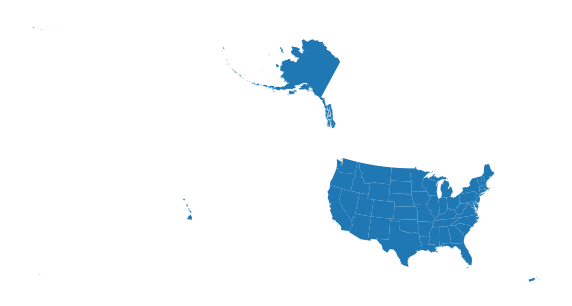

In [50]:
#Can be directly plotted
f = states.plot(figsize=(10,10))
f.axis('off')

Text(0.5, 1, 'USA state')

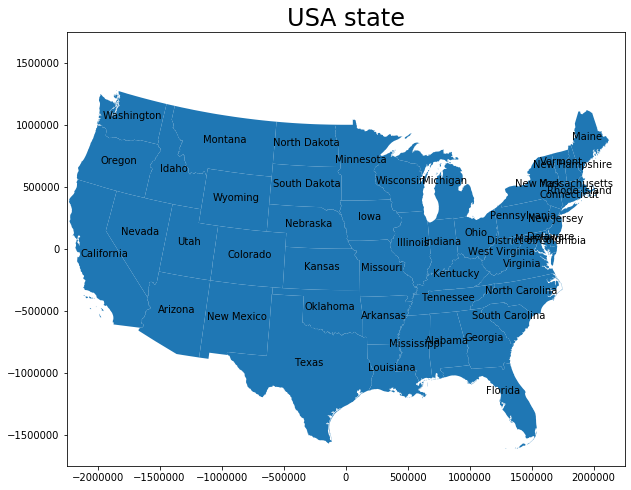

In [52]:
#Plot with annotation (show state name)
ax = states.plot(figsize=(10,10))
states.apply(lambda state: 
                  ax.annotate(s=state.NAME, 
                              xy=state.geometry.centroid.coords[0], 
                              ha='center', clip_on=True), axis=1);

ax.set_xlim((-2.25e6,2.25e6))
ax.set_ylim((-1.75e6,1.75e6))

ax.set_title('USA state', fontsize=24)

In [14]:
states.centroids = states.geometry.centroid
states.centroids

0      POINT (-86.82856727863836 32.78871085643125)
1      POINT (-152.2112567184512 64.19854169796479)
2      POINT (-111.6646390712508 34.29321115005884)
3      POINT (-105.5478146961501 38.99854551511103)
4      POINT (-72.72640497760267 41.62014853607063)
5       POINT (-82.4977195750063 28.62031342376801)
6       POINT (-83.44579716498156 32.6491778444807)
7      POINT (-114.6593242356111 44.38915930323095)
8        POINT (-86.2756254985561 39.9081367310627)
9      POINT (-98.38021614182942 38.48469938007206)
10     POINT (-91.97327150813439 31.04847772977295)
11     POINT (-71.79509897430435 42.25228990949797)
12     POINT (-94.30873988005874 46.31643137852156)
13     POINT (-92.47742457510013 38.36765846221193)
14     POINT (-109.6450091135248 47.03355906309619)
15     POINT (-116.6553851531073 39.35643474393473)
16     POINT (-74.66081603540738 40.18417144063729)
17     POINT (-75.50260474511218 42.94015453739781)
18     POINT (-100.4693146192818 47.44633606248693)
19     POINT